In [1]:
import geopandas as gpd
import pandas as pd
import numpy as np
import os

# 1. Merge city level all information

In [18]:
CURATED_FOLDER = "D:/Dropbox (Personal)/Personal Work/_Projects2023/01_city-never-was/_data/_curated"
TRANSFORM_FOLDER = "D:/Dropbox (Personal)/Personal Work/_Projects2023/01_city-never-was/_data/_transformed/t_city_profiles"

gdp = pd.read_csv(os.path.join(CURATED_FOLDER,"c_city_profiles", "c_city_gdp.csv"))
flux = pd.read_csv(os.path.join(TRANSFORM_FOLDER, "t_ffdas_flux_2015.csv"))
gdp['city_lower'] = gdp['City'].apply(lambda x: x.lower().replace(" ", "").split(",")[0])
profiledf = flux.merge(gdp, on = 'city_lower', how = 'inner')
print(profiledf['city_lower'].nunique(), " city profiles found")
# gdp['city_lower'].nunique()

127  city profiles found


In [19]:
profiledf.columns

Index(['city_lower', 'total_flux', 'mean_flux', 'flux_n_points', 'City',
       'country_clean', 'State/Province', 'urban_pop', 'Metro',
       'gdp_billion_metro', 'gdp_pop_metro', 'source_year', 'gdp_per_cap',
       'gdp_per_cap_country_2022'],
      dtype='object')

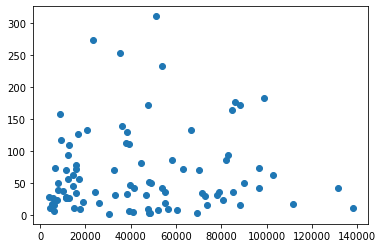

In [22]:
# check relationship betwen gdp and flux
import matplotlib.pyplot as plt
plt.scatter(profiledf['gdp_per_cap'], profiledf['total_flux'])

In [13]:
remain = [x for x in gdp['city_lower'] if x not in profiledf['city_lower'].tolist()]
remain

[]

In [16]:
FILENAME_CROSS = "01_seg_dalys_cross.csv"
y = ['diabetes_mellitus_cap', 'mental_and_substance_use_disorders_cap',
       'cardiovascular_diseases_cap', 'road_injury_cap','num_person_killed_per_lakh']

crossdf = pd.read_csv(os.path.join(CURATED_FOLDER, "c_analysis", FILENAME_CROSS))
crossdf['city_lower'] = crossdf['city_lower'].apply(lambda x: x.lower().replace(" ", "").split(",")[0])
mergedf = profiledf.merge(crossdf, on = 'city_lower', how = 'inner')
print(mergedf['city_lower'].nunique())

,hex_id,res,city_lower,img_count,building,greenery,street_furniture,sidewalk,car,person,...,log_sidewalk,log_car,log_person,log_bike,log_sky,log_road,log_diabetes_mellitus_cap,log_mental_and_substance_use_disorders_cap,log_cardiovascular_diseases_cap,log_road_injury_cap
0,860886607ffffff,6,stockholm,25140.0,20683.653500,32740.644352,89.822832,5402.286754,3871.875259,54.029356,...,8.594763,8.261752,4.007867,4.007606,10.656016,10.653376,6.70856,7.984735,8.397782,5.340462
1,86088660fffffff,6,stockholm,11408.0,19912.077840,41209.597475,110.845898,3831.753769,2141.873159,47.378769,...,8.251339,7.669903,3.879061,4.214157,10.458029,10.509015,6.70856,7.984735,8.397782,5.340462
2,860886617ffffff,6,stockholm,35324.0,16986.277092,32533.815338,82.755803,5628.616720,3290.653890,41.019052,...,8.635797,8.099145,3.738123,3.633673,10.716014,10.700944,6.70856,7.984735,8.397782,5.340462
3,86088661fffffff,6,stockholm,31210.0,33944.695258,28048.278340,141.890900,7571.070907,4539.449407,177.622749,...,8.932222,8.420781,5.185276,4.860873,10.341950,10.633157,6.70856,7.984735,8.397782,5.340462
4,860886627ffffff,6,stockholm,21408.0,13033.272188,42192.955484,94.775364,4809.206605,2582.209735,33.416433,...,8.478495,7.856788,3.538534,3.435490,10.703875,10.629470,6.70856,7.984735,8.397782,5.340462


In [17]:
crossdf['city_lower'].unique()

array(['stockholm', 'dzerzhinsk', 'tyumen', 'berezniki',
       'saintpetersburg', 'moscow', 'lemans', 'sheffield', 'manchester',
       'london', 'brussels', 'amsterdam', 'zwolle', 'budapest', 'vienna',
       'belgrade', 'kyiv', 'rovno', 'rome', 'palermo', 'thessaloniki',
       'istanbul', 'athens', 'copenhagen', 'berlin', 'kaunas', 'warsaw',
       'munich', 'milan', 'antwerp', 'paris', 'minneapolis', 'chicago',
       'denver', 'toledo', 'sanfrancisco', 'modesto', 'victoria',
       'portland,or', 'losangeles', 'newyork', 'philadelphia', 'boston',
       'raleigh', 'detroit', 'cleveland', 'montreal', 'toronto',
       'astrakhan', 'telaviv', 'jerusalem', 'nagoya', 'okayama', 'tokyo',
       'fukuoka', 'yamaguchi', 'seoul', 'madrid', 'saidpur', 'dhaka',
       'rajshahi', 'kanpur', 'delhi', 'jaipur', 'sitapur', 'hongkong',
       'dubai', 'houston', 'miami', 'gainesville,fl', 'culiacan',
       'killeen', 'reynosa', 'mexicocity', 'guadalajara', 'taipei',
       'lagos', 'gombe', 'k

# 2. Add Hex level information